# __Final Project:__ Hierarchical Equal Risk Contribution part 1

## __1. Import Library__

In [1]:
# importing our required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mlfinlab.portfolio_optimization.herc import HierarchicalEqualRiskContribution
from mlfinlab.portfolio_optimization.hrp import HierarchicalRiskParity

## __2. Import Historical Stock Prices from 2015 - 2020__

In [4]:
BBNI = pd.read_csv('BBNI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
CEKA = pd.read_csv('CEKA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DMAS = pd.read_csv('DMAS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DVLA = pd.read_csv('DVLA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
ELSA = pd.read_csv('ELSA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
EPMT = pd.read_csv('EPMT.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDR = pd.read_csv('INDR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDS = pd.read_csv('INDS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
IPCC = pd.read_csv('IPCC.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
LSIP = pd.read_csv('LSIP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MBAP = pd.read_csv('MBAP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFIN = pd.read_csv('MFIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFMI = pd.read_csv('MFMI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MSIN = pd.read_csv('MSIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
NRCA = pd.read_csv('NRCA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PBID = pd.read_csv('PBID.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PGLI = pd.read_csv('PGLI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
POWR = pd.read_csv('POWR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PPRE = pd.read_csv('PPRE.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PTRO = pd.read_csv('PTRO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
SCCO = pd.read_csv('SCCO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
TPMA = pd.read_csv('TPMA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
VINS = pd.read_csv('VINS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
WSBP = pd.read_csv('WSBP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)

l = [BBNI, CEKA, DMAS, DVLA, ELSA, EPMT, INDR, INDS, IPCC, LSIP, MBAP, MFIN, MFMI, MSIN, NRCA, PBID, PGLI, POWR, PPRE, PTRO, SCCO, TPMA, VINS, WSBP]
stock_prices = pd.concat(l,keys= ['BBNI', 'CEKA', 'DMAS', 'DVLA', 
                                 'ELSA', 'EPMT', 'INDR', 'INDS',
                                 'IPCC', 'LSIP', 'MBAP', 'MFIN',
                                 'MFMI', 'MSIN', 'NRCA', 'PBID',
                                 'PGLI', 'POWR', 'PPRE', 'PTRO',
                                 'SCCO', 'TPMA', 'VINS', 'WSBP'],axis=0).reset_index()
stock_prices = stock_prices.drop(['Open', 'High', 'Low', 'Close','Volume'], axis=1)
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])
stock_prices = stock_prices.set_index('Date', drop=True)
stock_prices = stock_prices.sort_index()
stock_prices = stock_prices.pivot_table('Adj Close', ['Date'], 'level_0')
stock_prices = stock_prices.dropna(axis=0)
# stock_prices = stock_prices.resample('D').sum()


stock_prices.tail(10)

level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-13,4750.0,1980.0,180.0,2170.925049,231.789001,1850.0,2270.0,2152.173828,422.0,875.0,...,348.313202,860.0,216.0,590.0,197.0,1625.0,9350.0,326.0,112.500008,204.0
2020-07-14,4720.0,1990.0,185.0,2200.000000,231.789001,1880.0,2260.0,2142.608643,430.0,890.0,...,344.587921,875.0,226.0,590.0,195.0,1610.0,9375.0,330.0,114.000000,202.0
2020-07-15,4710.0,1980.0,195.0,2210.000000,231.789001,1850.0,2270.0,2133.043457,428.0,940.0,...,339.000000,875.0,226.0,580.0,200.0,1625.0,9375.0,338.0,107.000000,204.0
2020-07-16,4700.0,1990.0,194.0,2220.000000,231.789001,1825.0,2250.0,2056.521729,438.0,940.0,...,339.000000,870.0,250.0,590.0,200.0,1675.0,9350.0,328.0,102.000000,208.0
2020-07-17,4670.0,1995.0,200.0,2190.000000,234.000000,1870.0,2260.0,2133.043457,438.0,945.0,...,340.000000,865.0,234.0,600.0,204.0,1725.0,9600.0,324.0,98.000000,208.0
2020-07-20,4540.0,2000.0,212.0,2160.000000,226.000000,1870.0,2250.0,2190.434814,436.0,990.0,...,324.000000,880.0,218.0,600.0,202.0,1800.0,9600.0,322.0,101.000000,202.0
2020-07-21,4680.0,2000.0,216.0,2190.000000,238.000000,1875.0,2300.0,2152.173828,430.0,1005.0,...,334.000000,875.0,224.0,600.0,195.0,1790.0,9800.0,324.0,98.000000,202.0
2020-07-22,4670.0,2010.0,226.0,2260.000000,238.000000,1875.0,2260.0,2200.000000,434.0,1000.0,...,330.000000,880.0,212.0,600.0,195.0,1800.0,9750.0,324.0,98.000000,202.0
2020-07-23,4710.0,1995.0,220.0,2330.000000,238.000000,1880.0,2300.0,2200.000000,442.0,1015.0,...,324.000000,875.0,214.0,600.0,196.0,1915.0,9725.0,336.0,100.000000,204.0


## __3. Visualize Our Portfolio Price vs Dates__

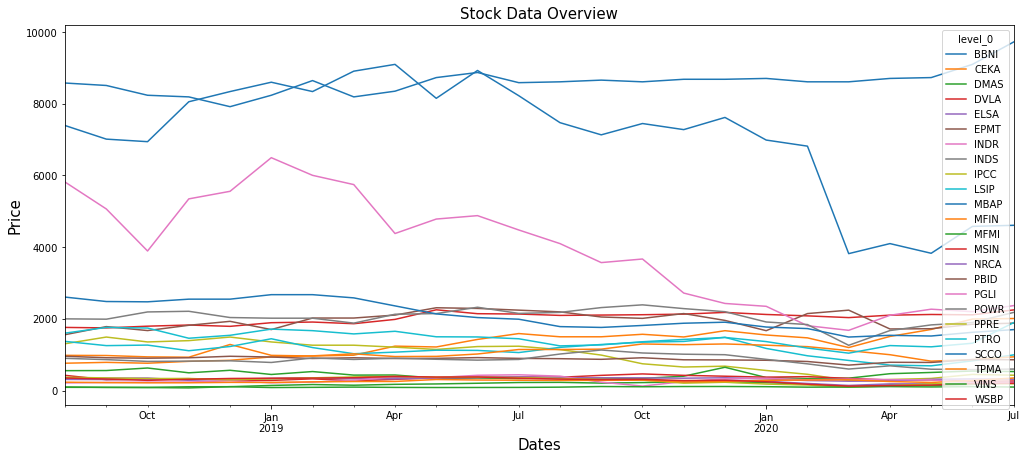

In [5]:
# Taking a quick look at our data
stock_prices.resample('M').last().plot(figsize=(17,7))
plt.ylabel('Price', size=15)
plt.xlabel('Dates', size=15)
plt.title('Stock Data Overview', size=15)
plt.show()

## __4. Checking the volatility of our portfolio__.
##### In this section, we calculate and visualize the volatility of our portfolio during n period using this formula

##### __Annualized Volatility__ = Standard Deviation * √252

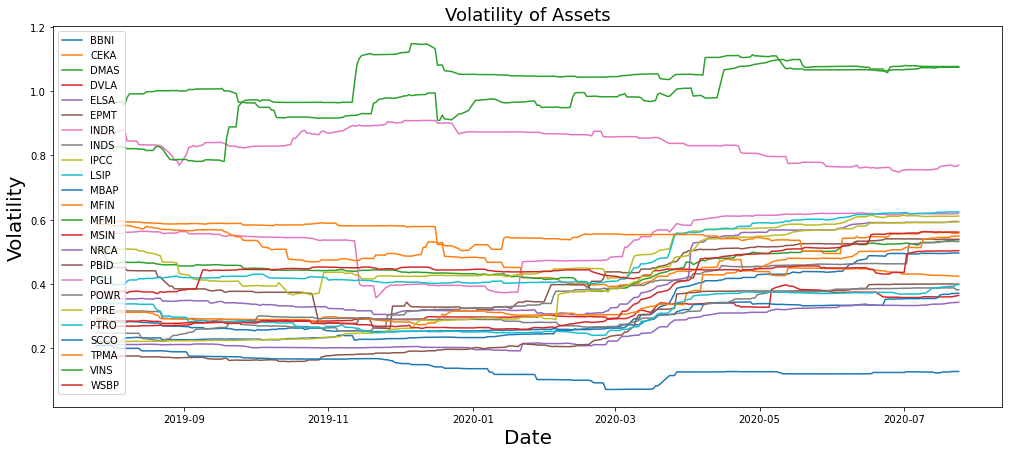

In [6]:
# plotting the volatility of our stocks
volatility = stock_prices.pct_change().rolling(window=252).std()*(252**0.5)

plt.figure(figsize=(17,7))
plt.plot(volatility)
plt.ylabel('Volatility', size=20)
plt.xlabel('Date', size=20)
plt.title('Volatility of Assets', size=18)
plt.legend(stock_prices.columns, loc='upper left')
plt.show()

## __5. Build our HERC Portfolio using Conditional Drawdown as Risk Measure__

#### A. Hierarchical Clustering with HERC

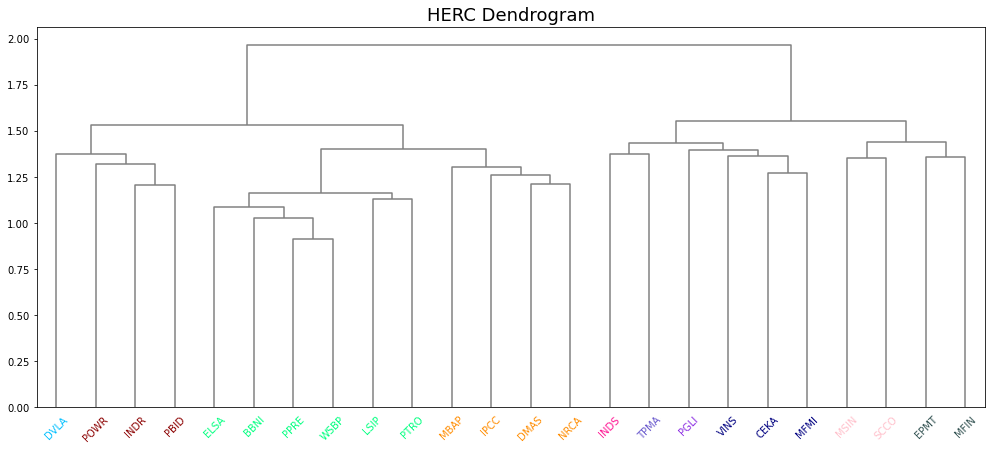

In [11]:
plt.figure(figsize=(17,7))
hercEW.plot_clusters(assets=stock_prices.columns)
plt.title('HERC Dendrogram', size=18)
plt.xticks(rotation=45)
plt.show()

#### B. Select the Optimal Number of the Clusters

In [12]:
print('#### C. Conditional Drawdown Portfolio WeightThe optimal number of clusters is: ' + str(hercEW.optimal_num_clusters))

#### C. Conditional Drawdown Portfolio WeightThe optimal number of clusters is: 10


#### C. Top Down Recursive Bisection

While variance is a very simple and popular representation of risk used in the investing world, it is not the optimal one and can underestimate the true risk of a portfolio which is why there are many other important risk metrics used by investment managers that can correctly reflect the true risk of a portfolio/asset. With respect to this, the original HRP algorithm can be tweaked to allocate its weights based on different risk representations of the clusters and generate better weights. The HERC method in mlfinlab provides the following risk metrics:

A. `variance` : Variance of the clusters is used as a risk metric.

B. `standard_deviation` : Standard deviation of the clusters is used as a risk metric.

C. `equal_weighting` : All clusters are weighed equally in terms of risk.

D. `expected_shortfall` : Expected shortfall (CVaR) of the clusters is used as a risk metric.

F. `conditional_drawdown_risk` : Conditional drawdown at risk (CDaR) of the clusters is used as a risk metric.

##### __i. Risk Measure:__ conditional drawdown risk

In [9]:
# building our conditional drawdown HERC portfolio
hercEW = HierarchicalEqualRiskContribution()
hercEW.allocate(asset_names=stock_prices.columns,
                asset_prices=stock_prices,
                optimal_num_clusters=10,
                risk_measure='conditional_drawdown_risk')
hercEW.weights

level_0,DVLA,POWR,INDR,PBID,ELSA,BBNI,PPRE,WSBP,LSIP,PTRO,...,INDS,TPMA,PGLI,VINS,CEKA,MFMI,MSIN,SCCO,EPMT,MFIN
0,0.112131,0.09178,0.034249,0.073376,0.021062,0.035438,0.020846,0.025115,0.023963,0.038265,...,0.018085,0.014416,0.009394,0.002839,0.003826,0.002584,0.03852,0.108116,0.033906,0.04512


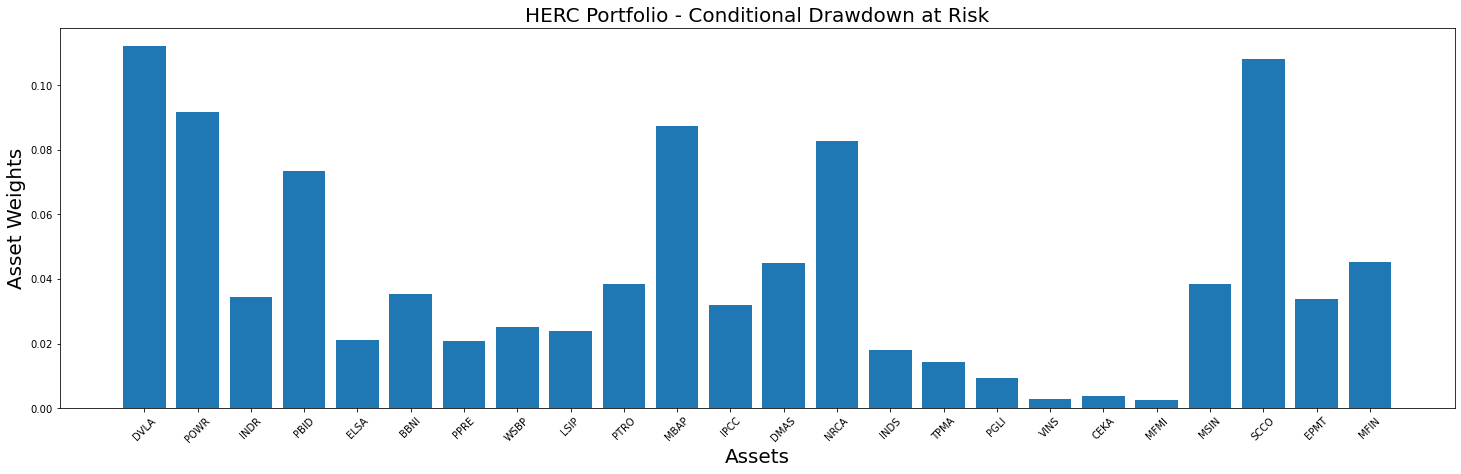

In [10]:
# plotting our optimal portfolio
hercEW_weights = hercEW.weights
y_pos = np.arange(len(hercEW_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hercEW_weights.columns), hercEW_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HERC Portfolio - Conditional Drawdown at Risk', size=20)
plt.show()

##### __ii. Risk Measure:__ standard deviation

In [11]:
# building our standard deviation HERC portfolio
herc_std = HierarchicalEqualRiskContribution()
herc_std.allocate(asset_names=stock_prices.columns,
                asset_prices=stock_prices,
                optimal_num_clusters=10,
                risk_measure='standard_deviation')
herc_std = herc_std.weights
herc_std

level_0,DVLA,POWR,INDR,PBID,ELSA,BBNI,PPRE,WSBP,LSIP,PTRO,...,INDS,TPMA,PGLI,VINS,CEKA,MFMI,MSIN,SCCO,EPMT,MFIN
0,0.152672,0.083607,0.024826,0.09127,0.02064,0.029615,0.024562,0.024827,0.017398,0.035402,...,0.016241,0.012529,0.008212,0.002707,0.009485,0.002395,0.02071,0.135677,0.032564,0.042721


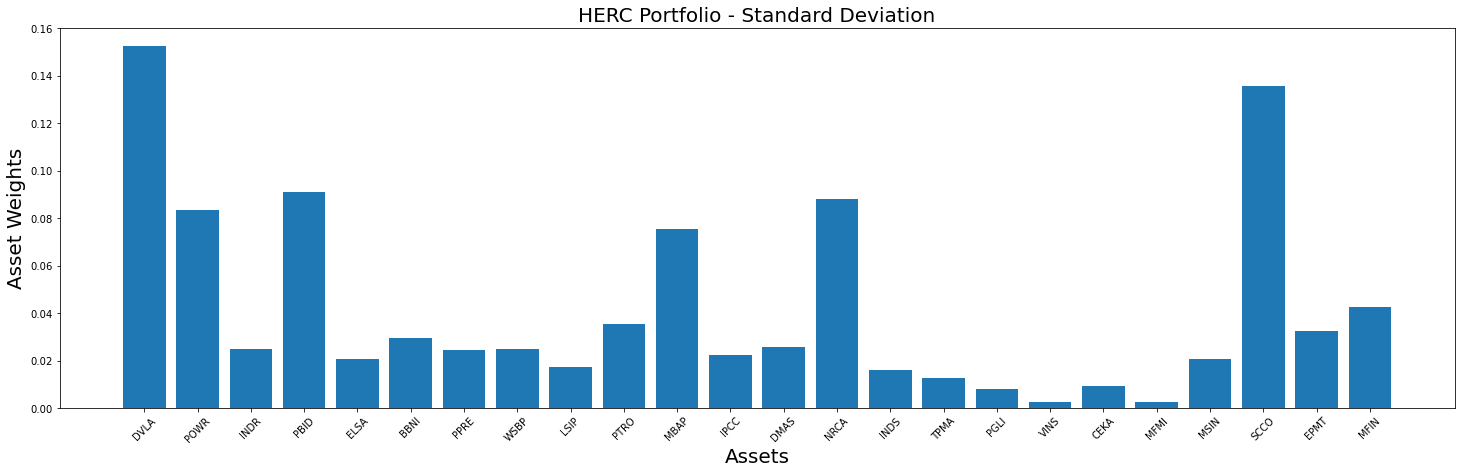

In [13]:
# plotting our optimal portfolio
y_pos = np.arange(len(herc_std.columns))

plt.figure(figsize=(25,7))
plt.bar(list(herc_std.columns), herc_std.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HERC Portfolio - Standard Deviation', size=20)
plt.show()

##### __iii. Risk Measure:__ expected shortfall

In [17]:
# building our standard deviation HERC portfolio
herc_exp = HierarchicalEqualRiskContribution()
herc_exp.allocate(asset_names=stock_prices.columns,
                asset_prices=stock_prices,
                optimal_num_clusters=10,
                risk_measure='expected_shortfall')
herc_exp = herc_exp.weights
herc_exp

level_0,DVLA,POWR,INDR,PBID,ELSA,BBNI,PPRE,WSBP,LSIP,PTRO,...,INDS,TPMA,PGLI,VINS,CEKA,MFMI,MSIN,SCCO,EPMT,MFIN
0,0.158826,0.076291,0.042696,0.076493,0.023827,0.023821,0.024827,0.025709,0.02321,0.02934,...,0.018386,0.013129,0.007236,0.004905,0.00809,0.003978,0.051771,0.096135,0.042107,0.051924


##### __iv. Risk Measure:__ variance

In [13]:
# building our variance HERC portfolio
hercMV_variance = HierarchicalEqualRiskContribution()
hercMV_variance.allocate(asset_names=stock_prices.columns,
                asset_prices=stock_prices,
                optimal_num_clusters=10,
                risk_measure='variance')
herc_MV_variance = hercMV_variance.weights
herc_MV_variance.T

,0
level_0,
DVLA,0.148930
POWR,0.106682
INDR,0.031678
PBID,0.116460
ELSA,0.019759
BBNI,0.028351
PPRE,0.023513
WSBP,0.023767
LSIP,0.016655


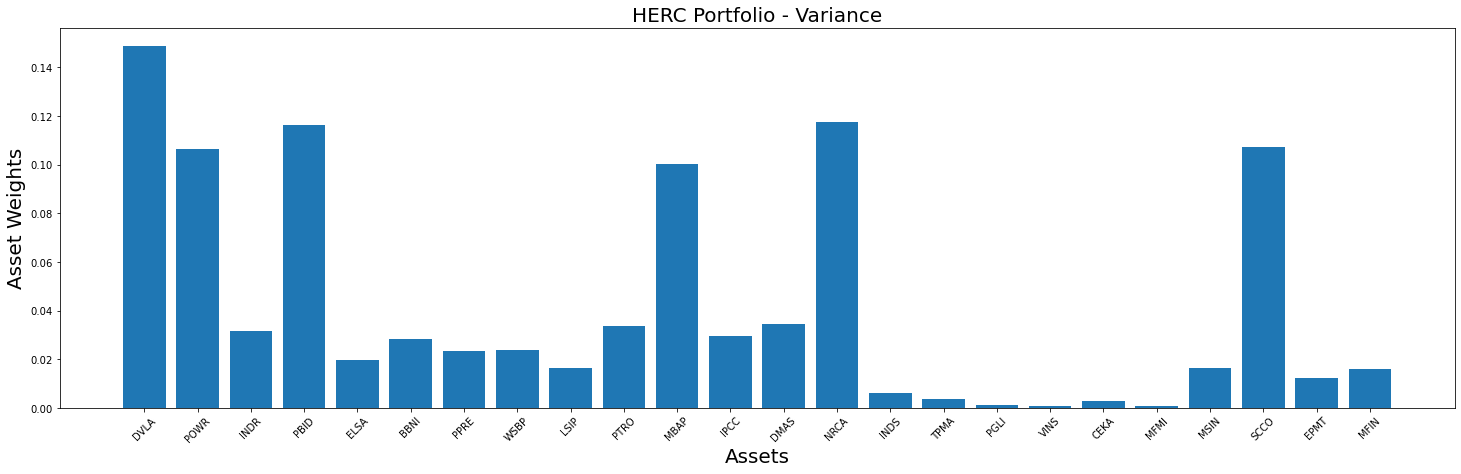

In [36]:
# plotting our optimal portfolio
y_pos = np.arange(len(herc_MV_variance.columns))

plt.figure(figsize=(25,7))
plt.bar(list(herc_MV_variance.columns), herc_MV_variance.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HERC Portfolio - Variance', size=20)
plt.show()

##### __v. Risk Measure:__ Equal Weighting

In [42]:
# building our equal_weighting HERC portfolio
hercEW_equal_weighting = HierarchicalEqualRiskContribution()
hercEW_equal_weighting.allocate(asset_names=stock_prices.columns,
                asset_prices=stock_prices,
                risk_measure='equal_weighting')
hercEW_equal_weighting = hercEW_equal_weighting.weights
hercEW_equal_weighting

level_0,DVLA,POWR,INDR,PBID,ELSA,BBNI,PPRE,WSBP,LSIP,PTRO,...,INDS,TPMA,PGLI,VINS,CEKA,MFMI,MSIN,SCCO,EPMT,MFIN
0,0.125,0.041667,0.041667,0.041667,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,...,0.0625,0.0625,0.0625,0.020833,0.020833,0.020833,0.0625,0.0625,0.0625,0.0625


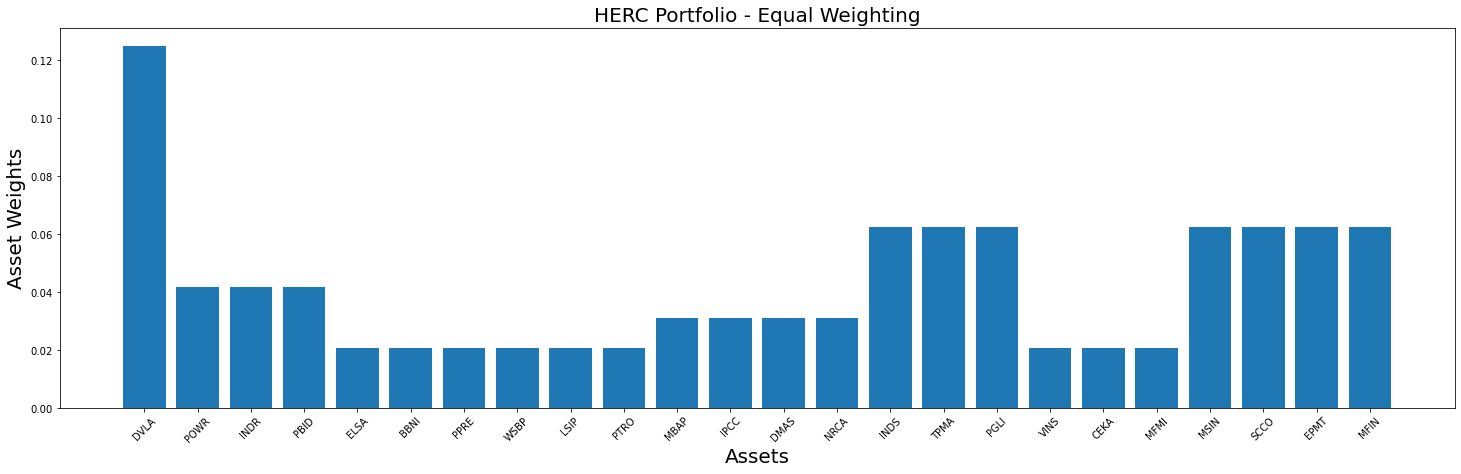

In [43]:
# plotting our optimal portfolio
y_pos = np.arange(len(hercEW_equal_weighting.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hercEW_equal_weighting.columns), hercEW_equal_weighting.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HERC Portfolio - Equal Weighting', size=20)
plt.show()

In [32]:
# building our equal_weighting HERC portfolio
hercEW_equal_weighting = HierarchicalEqualRiskContribution()
hercEW_equal_weighting.allocate(asset_names=stock_prices.columns,
                asset_prices=stock_prices,
                risk_measure='equal_weighting')
hercEW_equal_weighting = hercEW_equal_weighting.weights
hercEW_equal_weighting

level_0,DVLA,POWR,INDR,PBID,ELSA,BBNI,PPRE,WSBP,LSIP,PTRO,...,INDS,TPMA,PGLI,VINS,CEKA,MFMI,MSIN,SCCO,EPMT,MFIN
0,0.125,0.041667,0.041667,0.041667,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,...,0.0625,0.0625,0.0625,0.020833,0.020833,0.020833,0.0625,0.0625,0.0625,0.0625


## __5. Comparing HERC Portfolio using Risk Measure Parameter as Variable__

#### i. Conditional Drawdown Risk vs Standard Deviation

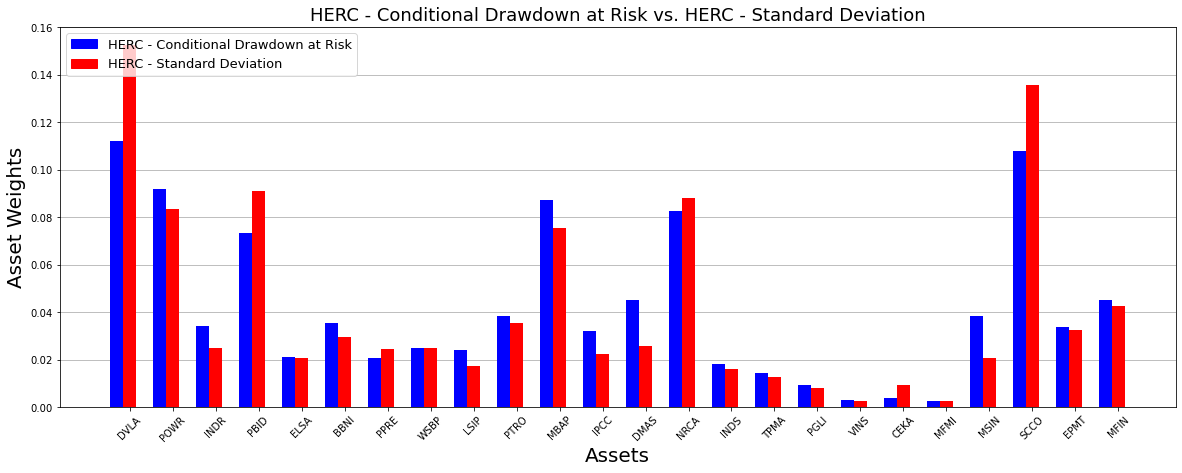

In [26]:
# plotting our HERC (Conditional Drawdown at Risk) vs. HERC (Standard Deviation Risk) graph
hercEW_weights = hercEW_weights[herc_std.columns]

x = np.arange(len(herc_std.columns))
bar_width = 0.3

plt.figure(figsize=(20,7))
plt.bar(x, hercEW_weights.values[0], color='blue', width=bar_width, zorder=2)
plt.bar(x + bar_width, herc_std.values[0], color='red', width=bar_width, zorder=2)

plt.xticks(x + bar_width, hercEW_weights, rotation=45, size=10)
plt.title('HERC - Conditional Drawdown at Risk vs. HERC - Standard Deviation', size=18)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)

blue_patch = mpatches.Patch(color='blue', label='HERC - Conditional Drawdown at Risk')
red_patch = mpatches.Patch(color='red', label='HERC - Standard Deviation')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', prop={'size': 13})

plt.grid(axis='y')
plt.show()

#### ii. Conditional Drawdown Risk vs Expected Shortfall

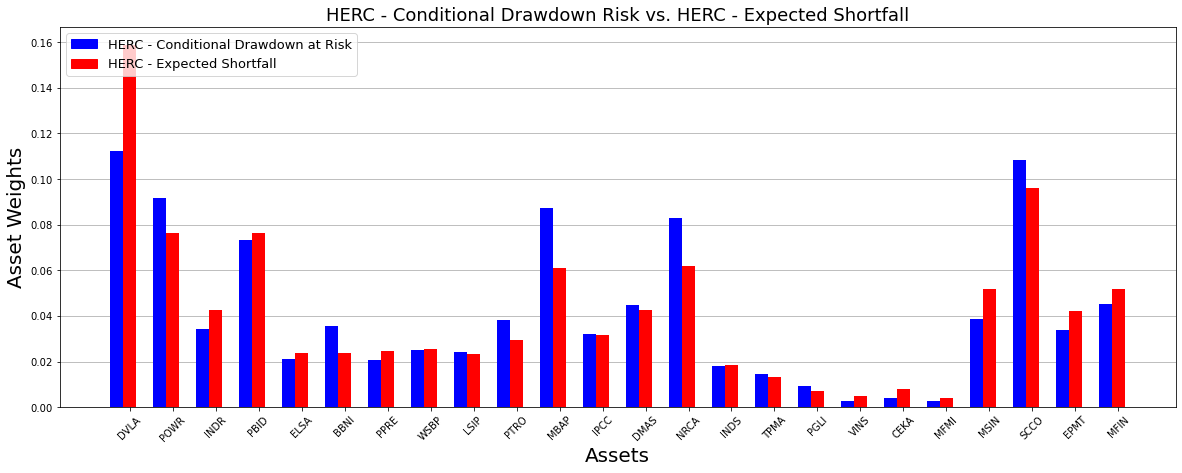

In [33]:
# plotting our HERC (Conditional Drawdown at Risk) vs. HERC (Expected Shortfall Risk) graph
hercEW_weights = hercEW_weights[herc_exp.columns]

x = np.arange(len(herc_exp.columns))
bar_width = 0.3

plt.figure(figsize=(20,7))
plt.bar(x, hercEW_weights.values[0], color='blue', width=bar_width, zorder=2)
plt.bar(x + bar_width, herc_exp.values[0], color='red', width=bar_width, zorder=2)

plt.xticks(x + bar_width, hercEW_weights, rotation=45, size=10)
plt.title('HERC - Conditional Drawdown Risk vs. HERC - Expected Shortfall', size=18)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)

blue_patch = mpatches.Patch(color='blue', label='HERC - Conditional Drawdown at Risk')
red_patch = mpatches.Patch(color='red', label='HERC - Expected Shortfall')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', prop={'size': 13})

plt.grid(axis='y')
plt.show()

#### iii. Conditional Drawdown Risk vs Variance Risk

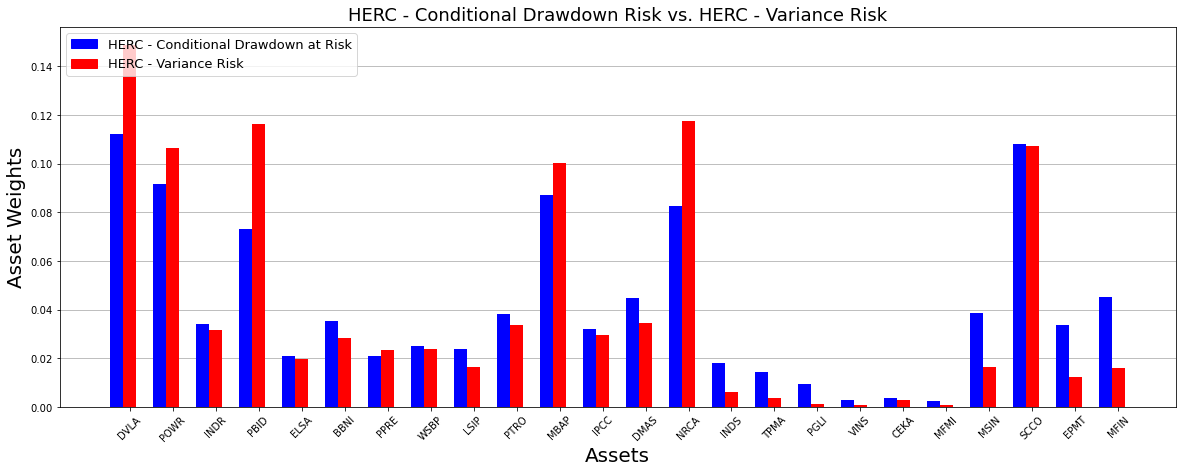

In [39]:
# plotting our HERC (Conditional Drawdown at Risk) vs. HERC (Variance Risk) graph
hercEW_weights = hercEW_weights[herc_MV_variance.columns]

x = np.arange(len(herc_MV_variance.columns))
bar_width = 0.3

plt.figure(figsize=(20,7))
plt.bar(x, hercEW_weights.values[0], color='blue', width=bar_width, zorder=2)
plt.bar(x + bar_width, herc_MV_variance.values[0], color='red', width=bar_width, zorder=2)

plt.xticks(x + bar_width, hercEW_weights, rotation=45, size=10)
plt.title('HERC - Conditional Drawdown Risk vs. HERC - Variance Risk', size=18)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)

blue_patch = mpatches.Patch(color='blue', label='HERC - Conditional Drawdown at Risk')
red_patch = mpatches.Patch(color='red', label='HERC - Variance Risk')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', prop={'size': 13})

plt.grid(axis='y')
plt.show()

#### iv. Conditional Drawdown Risk vs Equal Weighting Risk

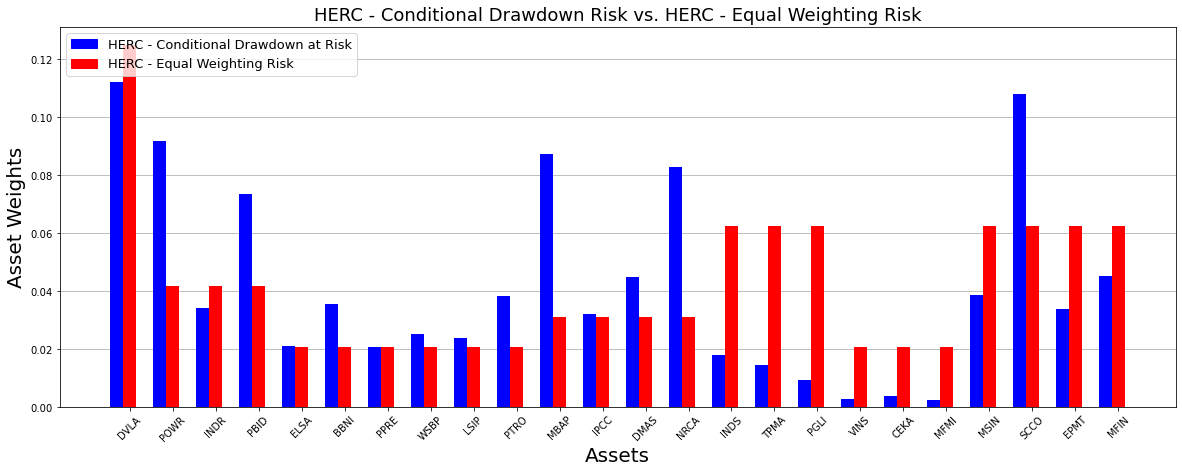

In [44]:
# plotting our HERC (Conditional Drawdown at Risk) vs. HERC (Equal Weighting Risk) graph
hercEW_weights = hercEW_weights[hercEW_equal_weighting.columns]

x = np.arange(len(hercEW_equal_weighting.columns))
bar_width = 0.3

plt.figure(figsize=(20,7))
plt.bar(x, hercEW_weights.values[0], color='blue', width=bar_width, zorder=2)
plt.bar(x + bar_width, hercEW_equal_weighting.values[0], color='red', width=bar_width, zorder=2)

plt.xticks(x + bar_width, hercEW_equal_weighting, rotation=45, size=10)
plt.title('HERC - Conditional Drawdown Risk vs. HERC - Equal Weighting Risk', size=18)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)

blue_patch = mpatches.Patch(color='blue', label='HERC - Conditional Drawdown at Risk')
red_patch = mpatches.Patch(color='red', label='HERC - Equal Weighting Risk')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', prop={'size': 13})

plt.grid(axis='y')
plt.show()

## __6. Build HRP Portfolio using Ward Linkage and Compare it to the HREC__

In [23]:
# building our HRP portfolio
hrp = HierarchicalRiskParity()
hrp.allocate(asset_names=stock_prices.columns,
             asset_prices=stock_prices,
            linkage = 'ward')
hrp.weights

level_0,DVLA,POWR,INDR,PBID,ELSA,BBNI,PPRE,WSBP,LSIP,PTRO,...,INDS,TPMA,PGLI,VINS,CEKA,MFMI,MSIN,SCCO,EPMT,MFIN
0,0.046618,0.041607,0.012355,0.041213,0.011699,0.016787,0.015969,0.011371,0.007969,0.027128,...,0.040907,0.029697,0.013869,0.010045,0.034912,0.008935,0.047595,0.323365,0.035302,0.046314


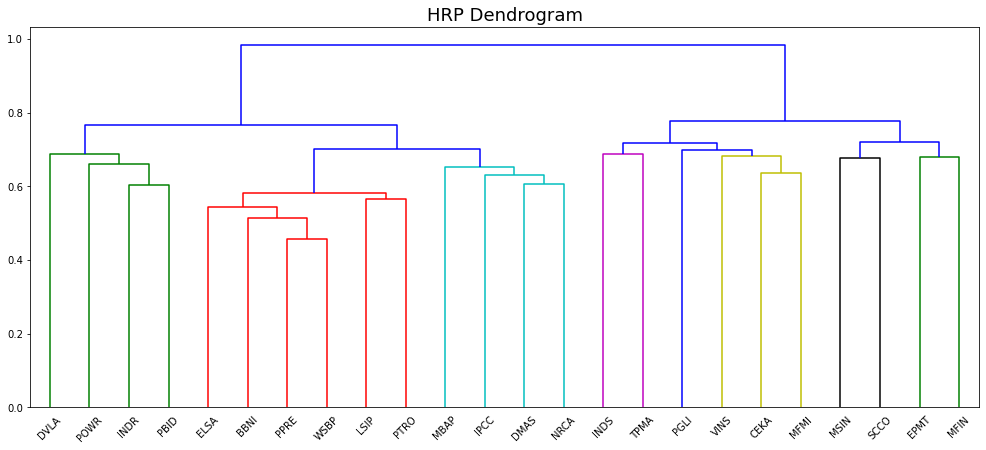

In [24]:
# plotting dendrogram of HRP portfolio
plt.figure(figsize=(17,7))
hrp.plot_clusters(stock_prices.columns)
plt.title('HRP Dendrogram', size=18)
plt.xticks(rotation=45)
plt.show()

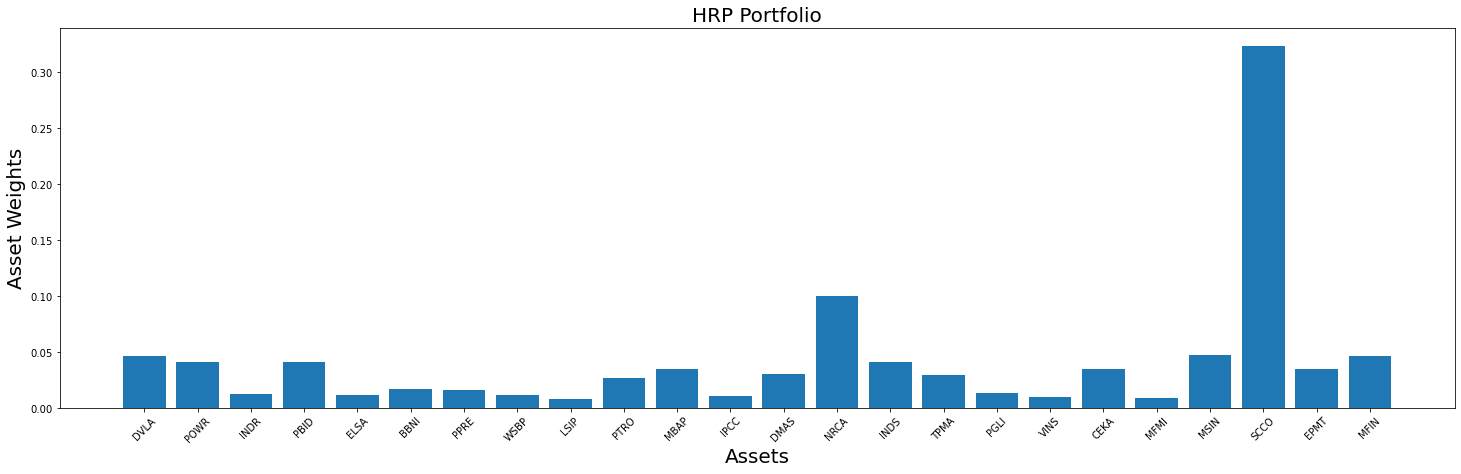

In [47]:
# plotting our optimal portfolio
hrp_weights = hrp.weights
y_pos = np.arange(len(hrp_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(hrp_weights.columns), hrp_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('HRP Portfolio', size=20)
plt.show()

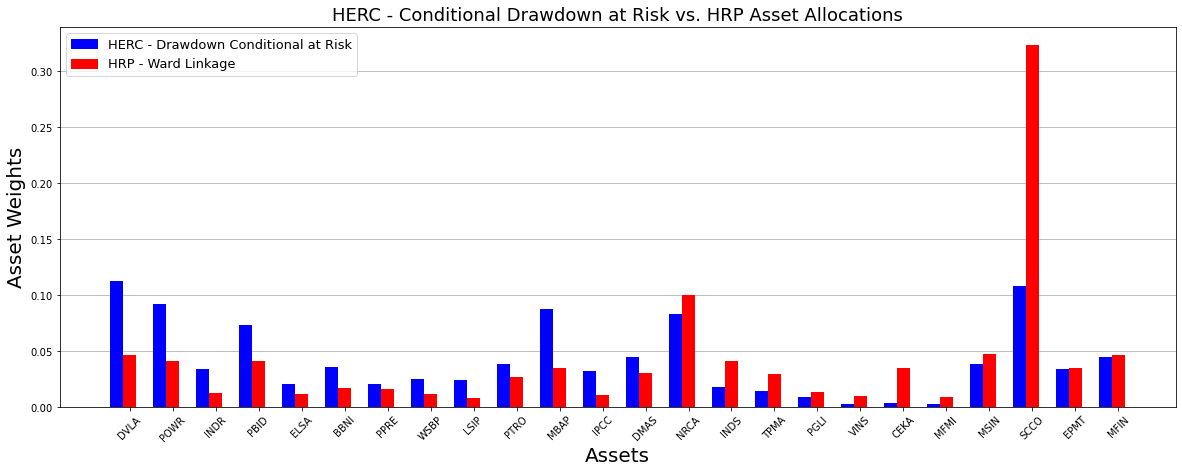

In [48]:
# plotting our HERC (Conditional Drawdown Risk) vs. HRP comparison graph
hercEW_weights = hercEW_weights[hrp_weights.columns]

x = np.arange(len(hrp_weights.columns))
bar_width = 0.3

plt.figure(figsize=(20,7))
plt.bar(x, hercEW_weights.values[0], color='blue', width=bar_width, zorder=2)
plt.bar(x + bar_width, hrp_weights.values[0], color='red', width=bar_width, zorder=2)

plt.xticks(x + bar_width, hercEW_weights, rotation=45, size=10)
plt.title('HERC - Conditional Drawdown at Risk vs. HRP Asset Allocations', size=18)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)

blue_patch = mpatches.Patch(color='blue', label='HERC - Drawdown Conditional at Risk')
red_patch = mpatches.Patch(color='red', label='HRP - Ward Linkage')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', prop={'size': 13})

plt.grid(axis='y')
plt.show()

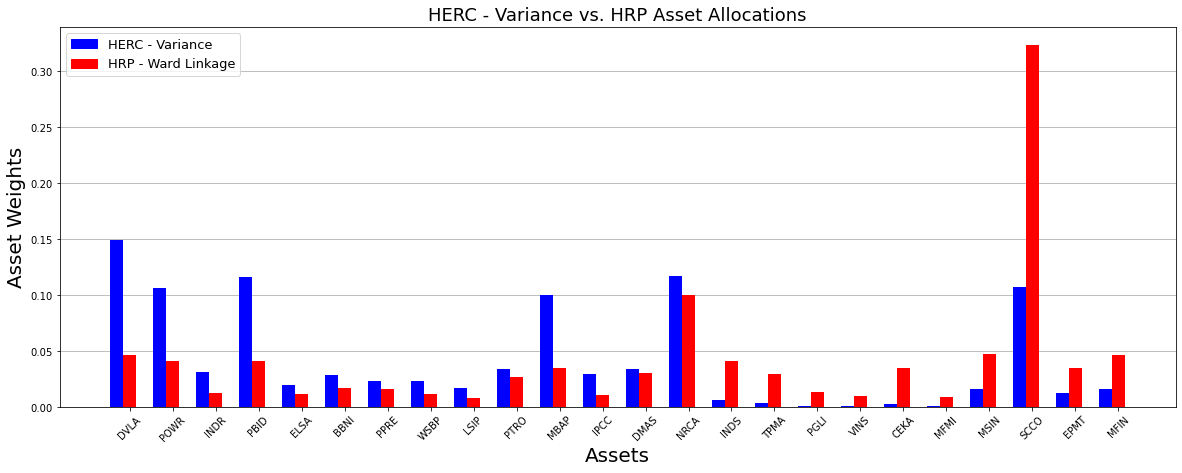

In [51]:
# plotting our HERC (Variance Risk) vs. HRP comparison graph
herc_MV_variance = herc_MV_variance[hrp_weights.columns]

x = np.arange(len(hrp_weights.columns))
bar_width = 0.3

plt.figure(figsize=(20,7))
plt.bar(x, herc_MV_variance.values[0], color='blue', width=bar_width, zorder=2)
plt.bar(x + bar_width, hrp_weights.values[0], color='red', width=bar_width, zorder=2)

plt.xticks(x + bar_width, herc_MV_variance, rotation=45, size=10)
plt.title('HERC - Variance vs. HRP Asset Allocations', size=18)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)

blue_patch = mpatches.Patch(color='blue', label='HERC - Variance')
red_patch = mpatches.Patch(color='red', label='HRP - Ward Linkage')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', prop={'size': 13})

plt.grid(axis='y')
plt.show()

<hr>